In [53]:
# pip install seaborn
# pip install pandas
# pip install lestpy

In [54]:
import seaborn as sns
import pandas as pd
from lestpy import lbm_model_dev as lp

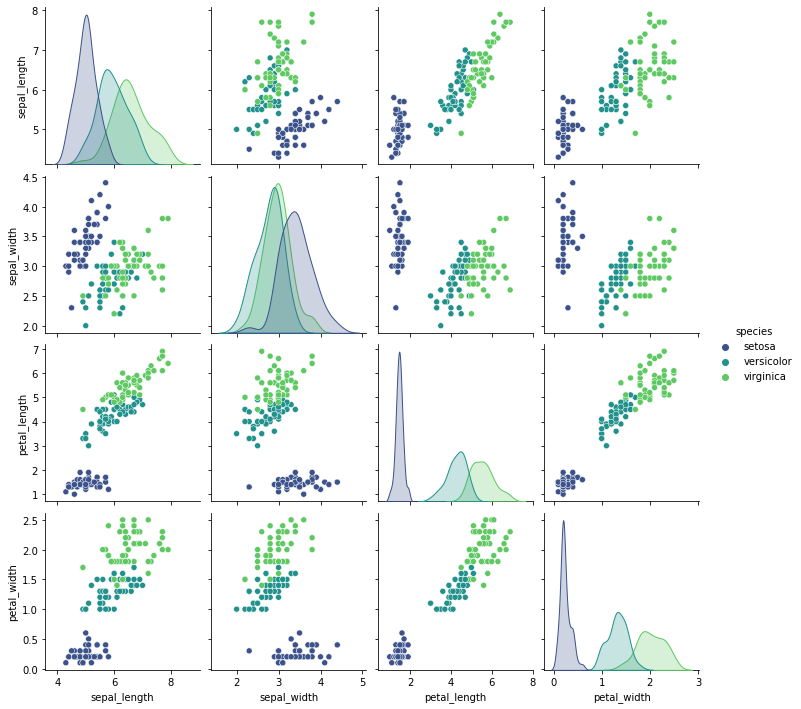

In [55]:
df = pd.read_csv('C:/Users/TTfr/Documents/Python/formation_python/iris.csv')

sns.pairplot(df, hue='species', palette='viridis')

In [56]:
for num, mask in enumerate(df.species.unique()):
    df['species'][df['species'] == mask] = num
df

C:\Users\TTfr\AppData\Local\Temp\ipykernel_10032\3705426433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'][df['species'] == mask] = num


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [57]:
y = df.pop('species')
X = df


In [58]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [59]:
model = lp.LBM_Regression()

In [60]:
X_transf = model.transform(X, y)
print(X_transf)

method = variable instant
calculé en 0.279 secondes


In [61]:
model.fit()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     484.0
Date:                Tue, 10 May 2022   Prob (F-statistic):           2.49e-92
Time:                        15:05:27   Log-Likelihood:                 46.992
No. Observations:                 150   AIC:                            -79.98
Df Residuals:                     143   BIC:                            -58.91
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.4224      0.597     12.425      0.0

In [79]:
model.model['species']['selected_features']

[['Sum of petal_length and petal_width high', 0.962, 86],
 ['sepal_length if petal_length average', 0.345, 25],
 ['petal_length average if petal_width', 0.296, 82],
 ['sepal_width or not petal_width', 0.359, 62],
 ['sepal_length and not sepal_width', 0.212, 8],
 ['petal_length if petal_width average', 0.253, 81]]

species
                R²  adj-R²  calc-Q²
model score  0.953   0.951    0.948


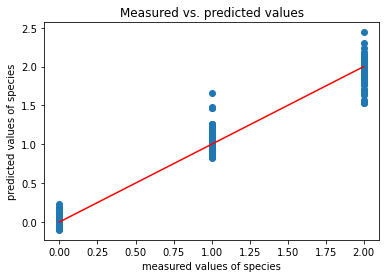

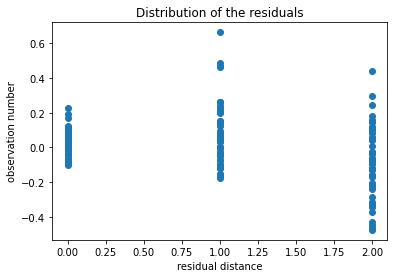

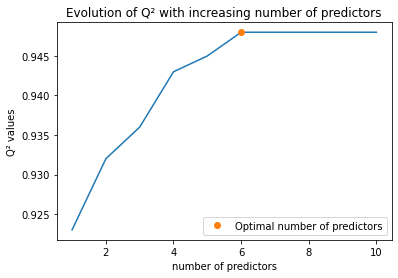

In [62]:
model.describe(X, y)

In [74]:
experimental_domain, mix = model.features_analysis(X)

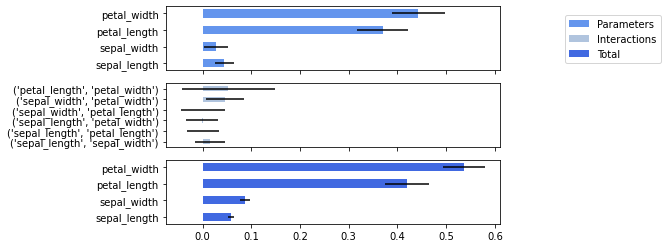

[{'S1': array([0.04498709, 0.02765319, 0.37043959, 0.4425089 ]),
  'S1_conf': array([0.0193445 , 0.02404649, 0.05229137, 0.05403936]),
  'ST': array([0.05778035, 0.08672636, 0.41983181, 0.53711603]),
  'ST_conf': array([0.00658679, 0.01101001, 0.04539153, 0.04302349]),
  'S2': array([[        nan,  0.01496132,  0.00142768, -0.0006016 ],
         [        nan,         nan,  0.00114412,  0.04602052],
         [        nan,         nan,         nan,  0.05250097],
         [        nan,         nan,         nan,         nan]]),
  'S2_conf': array([[       nan, 0.03014385, 0.03184072, 0.03229984],
         [       nan,        nan, 0.04556768, 0.03882276],
         [       nan,        nan,        nan, 0.09563652],
         [       nan,        nan,        nan,        nan]])}]

In [76]:
model.sensibility_analysis(experimental_domain)